In [425]:
#import statements
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
from numpy.linalg import norm

In [426]:
x = random.uniform(0,1, (100,2))

In [427]:
#sample x input
x[0]

array([0.88746261, 0.32569181])

In [428]:
#desired outputs

d = np.empty([100,1])
positive = []
negative = []

for i in range(100):
    if( x[i,1] < (0.2*math.sin(10*x[i,0])+0.3) or (math.pow(x[i,1]-0.8,2)+math.pow(x[i,0]-0.5,2))<(0.15*0.15)):
        d[i] = 1
        positive.append(x[i])
    else:
        d[i] = -1
        negative.append(x[i])


In [429]:
positive = np.asarray(positive)
negative = np.asarray(negative)
len(negative[:,0])

51

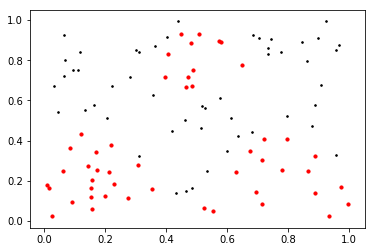

In [430]:
plt.scatter(positive[:,0], positive[:,1], label= "cross", color= "red", marker= ".", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "dot", color= "black",  
            marker= ".", s= 10)
plt.show()

# Using other kernel functions


In [645]:
#kernel function

def kernel(i, j):
    sigma = 0.5
    #print(i,j)
    return math.exp(- (math.pow(norm(i - j), 2)) / (2 * sigma*sigma) )

In [646]:
#formulating quadratic program
P = np.zeros([100,100])
for i in range(0,100):
    for j in range(0,100):
        #using rbf kernel
        #P[i][j] = d[i]*d[j]*math.exp(-((x1_term+x2_term)/2))
        P[i][j] = d[i]*d[j]*kernel(x[i,:], x[j,:])


In [647]:
print(P)

[[ 1.         -0.40738457  0.20651175 ... -0.57264418 -0.57276199
  -0.20878892]
 [-0.40738457  1.         -0.04801133 ...  0.95608762  0.8805847
   0.23652687]
 [ 0.20651175 -0.04801133  1.         ... -0.06581385 -0.14642094
  -0.49334278]
 ...
 [-0.57264418  0.95608762 -0.06581385 ...  1.          0.90271989
   0.23333919]
 [-0.57276199  0.8805847  -0.14642094 ...  0.90271989  1.
   0.45556922]
 [-0.20878892  0.23652687 -0.49334278 ...  0.23333919  0.45556922
   1.        ]]


In [648]:
#formulating in cvxopt's api definition
P = matrix(P)
q = matrix(-np.ones([100,1]),(100,1),'d')
G = matrix(-np.identity(100))
h = matrix(np.zeros([100,1]),(100,1),'d')
d2 = np.reshape(d,(1,100))
A = matrix(d2)
b = matrix(0,(1,1),'d')
sol = solvers.qp(P,q,G,h,A,b)

     pcost       dcost       gap    pres   dres
 0: -6.4096e+01 -1.7477e+02  3e+02  1e+01  3e+00
 1: -2.0042e+02 -3.2294e+02  2e+02  6e+00  1e+00
 2: -5.3434e+02 -6.9665e+02  2e+02  5e+00  1e+00
 3: -1.4151e+03 -1.6867e+03  3e+02  5e+00  1e+00
 4: -2.5482e+03 -2.9732e+03  5e+02  5e+00  1e+00
 5: -7.3609e+03 -8.4314e+03  1e+03  4e+00  1e+00
 6: -1.2940e+04 -1.5085e+04  2e+03  4e+00  9e-01
 7: -2.2957e+04 -2.8096e+04  5e+03  3e+00  7e-01
 8: -3.2210e+04 -4.0260e+04  8e+03  1e+00  3e-01
 9: -3.4882e+04 -3.5976e+04  1e+03  1e-01  3e-02
10: -3.5006e+04 -3.5030e+04  2e+01  3e-03  6e-04
11: -3.5010e+04 -3.5011e+04  9e-01  4e-05  8e-06
12: -3.5010e+04 -3.5010e+04  7e-02  4e-07  8e-08
13: -3.5010e+04 -3.5010e+04  1e-03  4e-09  8e-10
Optimal solution found.


In [649]:
sol['x'].size

(100, 1)

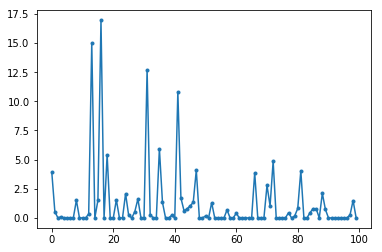

In [650]:
#plotting alpha values
t = []
for i in range(len(alpha_array)):
    t.append(i)

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([-80000,80000])    
plt.plot(t, alpha_array, marker = '.')

plt.show()

In [651]:
#plotting support vectors

alpha_array = sol['x']


sv_alphas = []
sv_x = []
sv_y = []


for i in range(100):
    if(alpha_array[i] > math.pow(10,1)):
        sv_alphas.append(alpha_array[i])
        sv_x.append(x[i,:])
        sv_y.append(d[i])


In [652]:
#alpha values for support vectors
sv_alphas

[17587.868723806212,
 15721.101068406999,
 231.58961161776378,
 8260.716258071365,
 1439.586643396921,
 4912.423590962866,
 2770.744213113275,
 1191.5555541417875,
 9472.662084619551,
 278.555521545036,
 5344.1037727151015,
 1779.669616491888,
 1030.0635453583031]

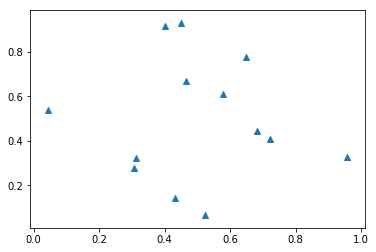

[[0.3076589  0.279254  ]
 [0.31180301 0.32098486]
 [0.6813185  0.44234848]
 [0.46508573 0.66772336]
 [0.449335   0.93000809]
 [0.72072213 0.40654149]
 [0.40106362 0.91791808]
 [0.95563333 0.32761035]
 [0.57745911 0.61072956]
 [0.04463928 0.54004148]
 [0.43106225 0.14065139]
 [0.52262256 0.06617931]
 [0.64772703 0.7767405 ]]


In [653]:
#support vectors
sv_x = np.asarray(sv_x)
plt.scatter(sv_x[:,0], sv_x[:,1], marker = '^')
plt.show()
print(sv_x)


In [654]:
#theta calculation

theta = 0
for i in range(len(sv_x)):
    theta = theta + sv_alphas[i]*sv_y[i]*kernel(sv_x[i], sv_x[1])
    print(theta)
theta = sv_y[1]-theta
print('final theta', theta)

[17526.11597373]
[1805.01490532]
[1633.88460729]
[7830.88235841]
[8491.02941429]
[11955.9782372]
[10618.85226664]
[10098.81931606]
[3144.52282687]
[2925.12363241]
[-1942.02369795]
[-512.00683656]
[30.5318978]
final theta [-31.5318978]


In [655]:
theta

array([-31.5318978])

In [656]:
len(sv_x)

13

In [657]:
#calculating function values on support vectors
w = np.zeros([len(sv_x),1]) 
gx = [] 
for i in range(len(sv_x)):
    for j in range(len(sv_x)):
        w[i] = w[i]+(sv_alphas[j]*sv_y[j]*kernel(sv_x[j], sv_x[i]))
    gx.append(w[i]+theta)
gx = np.asarray(gx)

In [658]:
gx

array([[ 0.99936985],
       [-1.        ],
       [-0.99567645],
       [ 1.00713099],
       [ 1.00882926],
       [ 1.00358433],
       [-0.99189873],
       [-0.99904804],
       [-0.9927694 ],
       [-1.00059527],
       [-1.00178659],
       [ 0.99755651],
       [ 1.00978   ]])

In [659]:
#


gx2 = np.zeros([400,400])
x1 = np.linspace(0,1,400)
x2 = np.linspace(0,1,400)
for i in range(len(x1)):
    for j in range(len(x2)):
        sum = 0
        for k in range(100):
            sum = sum + (alpha_array[k]*d[k]*kernel(x[k,:], np.asarray([x1[i],x2[j]])))
        gx2[i][j] = sum + theta
print(gx2)

[[ 67.49303248  67.40017671  67.3034696  ... -58.78362205 -59.11165423
  -59.43967267]
 [ 67.0994833   67.00679723  66.91027639 ... -58.44566043 -58.77401354
  -59.1023756 ]
 [ 66.70255456  66.6100396   66.51370654 ... -58.10636208 -58.435023
  -58.76371561]
 ...
 [ 12.26923438  12.27460538  12.27767948 ... -31.6320743  -31.55726298
  -31.48237186]
 [ 12.02134818  12.02591226  12.02818279 ... -31.92326755 -31.84715501
  -31.77095321]
 [ 11.76890105  11.77264972  11.77410833 ... -32.21442708 -32.13701384
  -32.05950203]]


In [660]:
#plotting all points
b_neg = []
hyperplane = []
b_pos = []
for i in range(400):
    for j in range(400):
        if(gx2[i][j]>-1.1 and gx2[i][j]<-0.9):
            #-1
            b_neg.append(np.asarray([x1[i],x2[j]]))
        if(gx2[i][j]>-0.01 and gx2[i][j]<0.01):
            #0
            hyperplane.append(np.asarray([x1[i],x2[j]]))
        if(gx2[i][j]>0.9 and gx2[i][j]<1.1):
            #1
            b_pos.append(np.asarray([x1[i],x2[j]]))


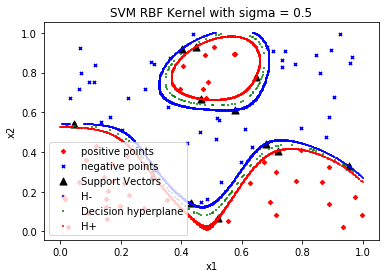

In [662]:
#plot all points
b_neg = np.asarray(b_neg)
hyperplane = np.asarray(hyperplane)
b_pos = np.asarray(b_pos)

#plotting positive and negative classes
positive_plot = plt.scatter(positive[:,0], positive[:,1], label= "cross", color= "red", marker= "D", s= 10)
negative_plot = plt.scatter(negative[:,0], negative[:,1], label= "dot", color= "blue",  
            marker= "x", s= 10)
positive_plot.set_label('positive points')
negative_plot.set_label('negative points')

#support vectors
sv_plot = plt.scatter(sv_x[:,0], sv_x[:,1], marker = '^', color = 'black', s=50)
sv_plot.set_label('Support Vectors')

H_minus = plt.scatter(b_neg[:,0], b_neg[:,1], label= "hline", color= "blue",  
            marker= "_", s= 5)

H_minus.set_label('H-')

H = plt.scatter(hyperplane[:,0], hyperplane[:,1], label= "hline", color= "green",  
            marker= "_", s= 5)
H.set_label('Decision hyperplane')
H_plus = plt.scatter(b_pos[:,0],b_pos[:,1], label= "hline", color= "red",  
            marker= "_", s= 5)

H_plus.set_label('H+')
plt.xlabel('x1')
plt.ylabel('x2')

plt.title('SVM RBF Kernel with sigma = 0.5')
plt.legend()
plt.show()